In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
len(merge_df["Mouse ID"])

1893

In [3]:
# Each mice has 10 timepoints listed. Checking if any mice has been listed more than 10 times.
count_mice = merge_df['Mouse ID'].value_counts()

count_mice

g989    13
a251    10
c282    10
q633    10
m550    10
        ..
v199     1
d133     1
h428     1
n482     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#Check if mouse g989 has been listed for more than 1 drug
data_mice=merge_df.set_index('Mouse ID')
mouse=data_mice.loc['g989']
mouse

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_from_duplicate=data_mice.drop('g989')
clean_data=cleaned_from_duplicate.reset_index()
               
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.

new_mice_number=clean_data['Mouse ID'].value_counts()

new_mice_number

a251    10
m650    10
m550    10
j365    10
r944    10
        ..
f932     1
v199     1
b447     1
u153     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

In [7]:
clean_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [8]:
len(clean_data["Mouse ID"].unique())

248

In [9]:
clean_data.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for
#each regimen
#Finding volume mean for each drug
regimen_mean=pd.DataFrame(clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
regimen_mean=regimen_mean.reset_index()
regimen_mean=regimen_mean.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
regimen_mean.head(15)

,Drug Regimen,Mean Tumor Volume
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [11]:
#Finding volume median for each drug
regimen_median=pd.DataFrame(clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())

regimen_median=regimen_median.reset_index()
regimen_median=regimen_median.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
regimen_median.head(15)

,Drug Regimen,Median Tumor Volume
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.446266
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [87]:
#Finding volume variance for each drug
regimen_variance=pd.DataFrame(clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
regimen_variance=regimen_variance.reset_index()
regimen_variance=regimen_variance.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
regimen_variance.head()

,Drug Regimen,Tumor Volume Variance
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479


In [12]:

#Finding volume standard deviation for each drug
regimen_dev=pd.DataFrame(clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
regimen_dev=regimen_dev.reset_index()
regimen_dev=regimen_dev.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Dev.'})
regimen_dev.head(15)

,Drug Regimen,Tumor Volume Std. Dev.
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708
5,Placebo,7.821003
6,Propriva,6.622085
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [89]:
#Finding volume SEM for each drug
regimen_sem=pd.DataFrame(clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
regimen_sem=regimen_sem.reset_index()
regimen_sem=regimen_sem.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Std. Error'})
regimen_sem.head()

,Drug Regimen,Tumor Volume Std. Error
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_1=pd.merge(regimen_mean, regimen_median,how='left',on='Drug Regimen')

summary_stats_1.head()
# This method produces everything in a single groupby function


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume
0,Capomulin,40.675741,41.557809
1,Ceftamin,52.591172,51.776157
2,Infubinol,52.884795,51.820584
3,Ketapril,55.235638,53.698743
4,Naftisol,54.331565,52.509285


In [92]:
#Adding/joining variance
summary_stats_2=pd.merge(summary_stats_1, regimen_variance,how='left',on='Drug Regimen')

summary_stats_2

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance
0,Capomulin,40.675741,41.557809,24.947764
1,Ceftamin,52.591172,51.776157,39.290177
2,Infubinol,52.884795,51.820584,43.128684
3,Ketapril,55.235638,53.698743,68.553577
4,Naftisol,54.331565,52.509285,66.173479
5,Placebo,54.033581,52.288934,61.168083
6,Propriva,52.320930,50.446266,43.852013
7,Ramicane,40.216745,40.673236,23.486704
8,Stelasyn,54.233149,52.431737,59.450562
9,Zoniferol,53.236507,51.818479,48.533355


In [93]:
#Adding/joining std.dev
summary_stats_3=pd.merge(summary_stats_2, regimen_dev,how='left',on='Drug Regimen')

summary_stats_3

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.
0,Capomulin,40.675741,41.557809,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,39.290177,6.268188
2,Infubinol,52.884795,51.820584,43.128684,6.567243
3,Ketapril,55.235638,53.698743,68.553577,8.279709
4,Naftisol,54.331565,52.509285,66.173479,8.134708
5,Placebo,54.033581,52.288934,61.168083,7.821003
6,Propriva,52.320930,50.446266,43.852013,6.622085
7,Ramicane,40.216745,40.673236,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,48.533355,6.966589


In [19]:
#Adding/joining SEM
summary_stats=pd.merge(summary_stats_3, regimen_sem,how='left',on='Drug Regimen')

summary_stats.head(10)

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Store the count of mice grouped by drug regimen and timepoint
drug_and_mouse = pd.DataFrame(clean_data.groupby(['Drug Regimen'])['Mouse ID'].count())
drug_and_mouse = drug_and_mouse.rename(columns={'Mouse ID':'Mouse Count'})

drug_and_mouse

,Mouse Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


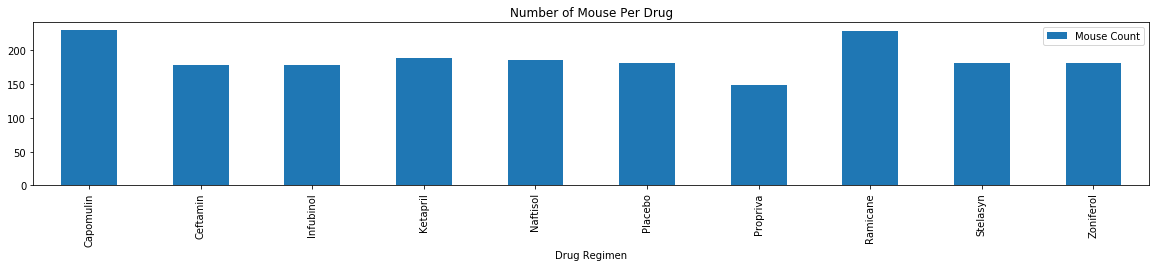

<Figure size 432x288 with 0 Axes>

In [100]:
# Use DataFrame.plot() in order to create a bar chart of the data
drug_and_mouse.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Number of Mouse Per Drug")
# Save the graph in images folder
plt.savefig("Images/Bar Chart 1.png")
plt.show()
plt.tight_layout()

In [22]:
drug_for_pyplot=drug_and_mouse.reset_index()
drug_for_pyplot

,Drug Regimen,Mouse Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


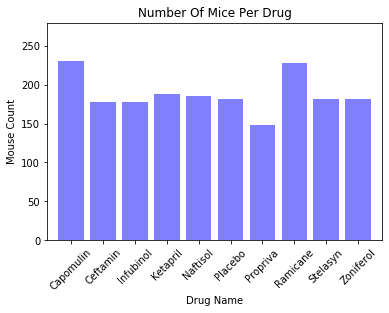

In [99]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create an array that contains the number of users each language has
drugs = drug_for_pyplot['Mouse Count']
type(drugs)
x_axis = np.arange(len(drugs))

# Tell matplotlib that we will be making a bar chart
# Mouse Count is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, drugs, color='b', alpha=0.5, align='center')

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_for_pyplot["Drug Regimen"],rotation=45)

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(drug_for_pyplot["Mouse Count"])+50)

# Give our chart some labels and a tile
plt.title("Number Of Mice Per Drug")
plt.xlabel("Drug Name")
plt.ylabel("Mouse Count")
#Save the graph in images folder
plt.savefig("Images/Bar Chart 2.png")
plt.show()

In [ ]:
#Saving the image
plt.tight_layout()
# Save the graph in images folder
plt.savefig("Images/Bar Chart.png")
plt.show()

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Store the count of mice grouped by male and female
male_and_female = pd.DataFrame(clean_data.groupby(['Sex'])['Sex'].count())
male_and_female = male_and_female.rename(columns={'Sex':'Gender Count'})

male_and_female


,Gender Count
Sex,
Female,922
Male,958


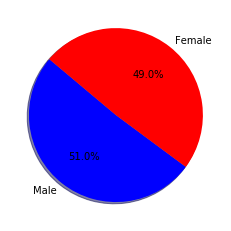

In [25]:
## Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["blue", "red"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);

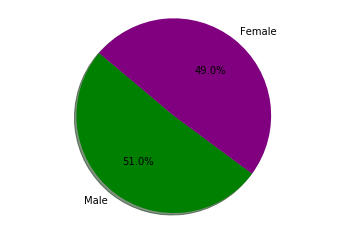

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
gender_counts = [958,922]
colors = ["green","purple"]
explode = (0,0)
plt.pie(gender_counts, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save the graph in images folder
plt.savefig("Images/Pie Chart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=pd.DataFrame(clean_data.groupby(['Mouse ID'])['Timepoint'].max())
greatest_timepoint=greatest_timepoint.reset_index()
greatest_timepoint=greatest_timepoint.rename(columns={"Timepoint": "Greatest Timepoint"})
greatest_timepoint

,Mouse ID,Greatest Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [28]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
grouped_with_timepoint=pd.merge(clean_data, greatest_timepoint,how='left',on='Mouse ID')
#grouped_with_timepoint=grouped_with_timepoint.reset_index()
grouped_with_timepoint.head(15)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Greatest Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
5,b128,25,43.262145,1,Capomulin,Female,9,22,45
6,b128,30,40.605335,1,Capomulin,Female,9,22,45
7,b128,35,37.967644,1,Capomulin,Female,9,22,45
8,b128,40,38.379726,2,Capomulin,Female,9,22,45
9,b128,45,38.982878,2,Capomulin,Female,9,22,45


In [29]:
drugs_index=grouped_with_timepoint.set_index('Drug Regimen')
drugs_index.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Greatest Timepoint
Drug Regimen,,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22,45
Capomulin,b128,5,45.651331,0,Female,9,22,45
Capomulin,b128,10,43.270852,0,Female,9,22,45
Capomulin,b128,15,43.784893,0,Female,9,22,45
Capomulin,b128,20,42.731552,0,Female,9,22,45
Capomulin,b128,25,43.262145,1,Female,9,22,45
Capomulin,b128,30,40.605335,1,Female,9,22,45
Capomulin,b128,35,37.967644,1,Female,9,22,45
Capomulin,b128,40,38.379726,2,Female,9,22,45


In [30]:
#Getting a table displaying four needed drugs
i_need=drugs_index.loc[['Capomulin','Ramicane','Infubinol', 'Ceftamin']]
i_need.head(12)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Greatest Timepoint
Drug Regimen,,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22,45
Capomulin,b128,5,45.651331,0,Female,9,22,45
Capomulin,b128,10,43.270852,0,Female,9,22,45
Capomulin,b128,15,43.784893,0,Female,9,22,45
Capomulin,b128,20,42.731552,0,Female,9,22,45
Capomulin,b128,25,43.262145,1,Female,9,22,45
Capomulin,b128,30,40.605335,1,Female,9,22,45
Capomulin,b128,35,37.967644,1,Female,9,22,45
Capomulin,b128,40,38.379726,2,Female,9,22,45


In [31]:
#Making a table that lists greatest tumor volume at the final timepoint for each mouse
grouped_with_timepoint1=pd.DataFrame(i_need.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].last())
grouped_with_timepoint1=grouped_with_timepoint1.reset_index()
#grouped_with_timepoint1=grouped_with_timepoint1.drop(columns='Timepoint')
grouped_with_timepoint1=grouped_with_timepoint1.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume" })
                                                              

#grouped_with_timepoint3=grouped_with_timepoint1.set_index["Drug Regimen"]
grouped_with_timepoint1

,Drug Regimen,Mouse ID,Final Tumor Volume
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [32]:
drugs_four=grouped_with_timepoint1.set_index('Drug Regimen')
drugs_four

,Mouse ID,Final Tumor Volume
Drug Regimen,,
Capomulin,b128,38.982878
Capomulin,b742,38.939633
Capomulin,f966,30.485985
Capomulin,g288,37.074024
Capomulin,g316,40.159220
...,...,...
Ramicane,s508,30.276232
Ramicane,u196,40.667713
Ramicane,w678,43.166373


In [33]:
drug_vs_tumor=pd.DataFrame(grouped_with_timepoint1.groupby(['Drug Regimen'])['Final Tumor Volume'].mean())
drug_vs_tumor=drug_vs_tumor.rename(columns={'Final Tumor Volume':'Average Tumor Volume'})
drug_vs_tumor

,Average Tumor Volume
Drug Regimen,
Capomulin,36.667568
Ceftamin,57.753977
Infubinol,58.178246
Ramicane,36.191390


In [68]:
#Making a loop to get tumor volume for each drugs
list_drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs_list=[]

for i in list_drugs:
    tumor_volume=drugs_four.loc[i,'Final Tumor Volume']
    drugs_list.append(tumor_volume)
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    median=quartiles[0.5]
print(lowerq,iqr,upperq,lower_bound,lower_bound,upper_bound,median)

48.72207785 15.577752179999997 64.29983003 25.355449580000002 25.355449580000002 87.66645829999999 59.85195552


In [73]:
#Append tumor volume in list_drugs
drugs_list

[Drug Regimen
 Capomulin    38.982878
 Capomulin    38.939633
 Capomulin    30.485985
 Capomulin    37.074024
 Capomulin    40.159220
 Capomulin    47.685963
 Capomulin    37.311846
 Capomulin    38.125164
 Capomulin    38.753265
 Capomulin    41.483008
 Capomulin    38.846876
 Capomulin    28.430964
 Capomulin    33.329098
 Capomulin    46.539206
 Capomulin    32.377357
 Capomulin    41.581521
 Capomulin    23.343598
 Capomulin    40.728578
 Capomulin    34.455298
 Capomulin    31.023923
 Capomulin    40.658124
 Capomulin    39.952347
 Capomulin    36.041047
 Capomulin    28.484033
 Capomulin    31.896238
 Name: Final Tumor Volume, dtype: float64,
 Drug Regimen
 Ramicane    38.407618
 Ramicane    43.047543
 Ramicane    38.810366
 Ramicane    32.978522
 Ramicane    38.342008
 Ramicane    33.397653
 Ramicane    37.311236
 Ramicane    40.659006
 Ramicane    29.128472
 Ramicane    33.562402
 Ramicane    36.374510
 Ramicane    31.560470
 Ramicane    36.134852
 Ramicane    22.050126
 Ramica

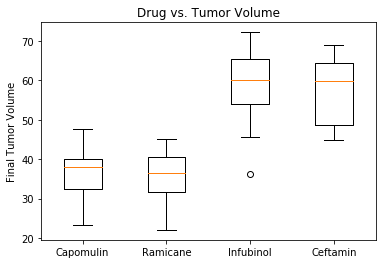

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug vs. Tumor Volume')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(drugs_list,labels=list_drugs)
# Save the graph in images folder
plt.savefig("Images/Box Plot.png")
plt.show()

## Line and Scatter Plots

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Selecting Capomulin
select_capomulin = grouped_with_timepoint.loc[grouped_with_timepoint['Drug Regimen'] == 'Capomulin'] 
#select_capomulin=select_capomulin.reset_index()
select_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Greatest Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [39]:
#Select a mice b128
select_mice=select_capomulin.loc[select_capomulin['Mouse ID'] == 'b128']
select_mice

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Greatest Timepoint
0,0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,4,b128,20,42.731552,0,Capomulin,Female,9,22,45
5,5,b128,25,43.262145,1,Capomulin,Female,9,22,45
6,6,b128,30,40.605335,1,Capomulin,Female,9,22,45
7,7,b128,35,37.967644,1,Capomulin,Female,9,22,45
8,8,b128,40,38.379726,2,Capomulin,Female,9,22,45
9,9,b128,45,38.982878,2,Capomulin,Female,9,22,45


In [40]:
#Put Timepoint column into a list for x-axis
x_axis=list(select_mice['Timepoint'])
x_axis

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [41]:
#Put Tumor Volume column into a list for y-axis
y_axis=list(select_mice["Tumor Volume (mm3)"])
y_axis

[45.0,
 45.65133131,
 43.2708519,
 43.78489343,
 42.731552,
 43.26214483,
 40.60533486,
 37.96764437,
 38.3797259,
 38.98287774]

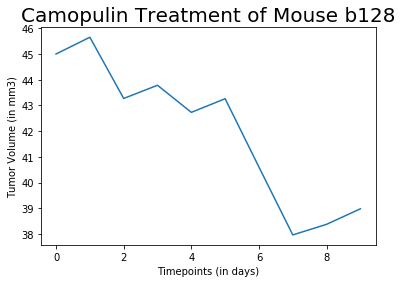

In [103]:
# Give the line graph axis labels
plt.xlabel("Timepoints (in days)")
plt.ylabel("Tumor Volume (in mm3)")
plt.title("Camopulin Treatment of Mouse b128",fontsize=20)

# Have to plot our chart once again as it doesn't stick after being shown
plt.plot(x_axis, y_axis)
# Save the graph in images folder
plt.savefig("Images/Line Graph.png")
plt.show()

## Correlation and Regression

In [60]:
#Making a table that has mouse weight with average tumor volume
group_by_mouse=pd.DataFrame(select_capomulin.groupby(['Mouse ID','Weight (g)'])["Tumor Volume (mm3)"].mean())
group_by_mouse=group_by_mouse.reset_index()
group_by_mouse

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


#Create x-axis using mice weight taking capomulin
x_axis_scatter=group_by_mouse["Weight (g)"]

In [62]:
#Create y-axis using mice weight taking capomulin
y_axis_scatter=group_by_mouse["Tumor Volume (mm3)"]


The correlation between weight and tumor volume is 0.84


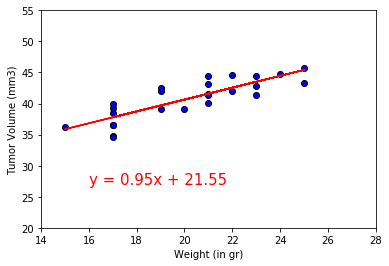

In [105]:
# Set the upper and lower limits of our y axis
plt.ylim(20,55)
# Set the upper and lower limits of our x axis
plt.xlim(14,28)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Weight (in gr)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", facecolors="blue", edgecolors="black");
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(16,27),fontsize=15,color="red")
#save the graph in images folder
plt.savefig("Images/Scatterplot.png")

# Analysis


This experiment is about experimenting and analyzing the effect of 10 different drugs regimens on mice tumor volume. In this experiment, there are 248 mice of which  49% are female and 51% are male. The drug regimens were given over the course of maximum of 45 days. The close analysis were about mainly 4 drug regimens such as Capomulin, Ceftamin, Ramicane and Infubinol. Capomulin and Ramicane were given to the majority of the mice, with the count of 230 and 228 respecteviley.178 of the mice were treated with Infubinol and Ceftamin. If we look at the effect of these drugs on the tumor volume, infubinol and Ceftamin increased the averega of the final tumor volume for the final timepoint by about 5 mm3, while Capomulin and Ramicane decresed the average tumor volume from about 41 mm3 to 36 mm3. Therefore, among 4 of these drug regimens, Capomulin and Ramicane are the most effective drugs in redicung the size of the tumor volume. Also, analysis suggests that there is a positive correlation between tumor volume and mouse weight, with the correlation of 0.84.